In [1]:
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:

def extract_messages_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    messages = re.findall(r'<p>(.*?)</p>', content)
    return messages

def extract_messages_from_folder(folder_path):
    all_messages = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            file_path = os.path.join(folder_path, filename)
            messages = extract_messages_from_html(file_path)
            all_messages.extend(messages)
    return all_messages

def generate_wordcloud(text):
    # Process the text to get word frequencies
    word_list = text.split()
    # Remove words that contain '@', '[', '&', and ')'
    filtered_word_list = [word for word in word_list if '@' not in word and '[' not in word and '&' not in word and ')' not in word]

    # Calculate word frequencies
    word_freq = {word: filtered_word_list.count(word) for word in set(filtered_word_list)}

    # Balance the word frequencies: Cap them at 40
    word_freq = {word: min(freq, 15) for word, freq in word_freq.items()}

    # Additional stopwords
    # Manually set the frequency of certain words
    # word_freq['Â§™Èöæ'] = 60
    # word_freq['ÈªÑËïâ'] = 40
    # word_freq['ËøòÊàëË°ÄÊ±óÈí±ÔºÅÔºÅÔºÅ'] = 20
    # Define a list of words to remove
    stopwords_add = ['why', 'why:', 'ÂõæÁâá','[ÂõæÁâá]','Â∏¶ÊúâÂºïÁî®ÁöÑÊñáÊú¨Ê∂àÊÅØ','Ëß£ÊûêÂ§±Ë¥•','[Â∏¶ÊúâÂºïÁî®ÁöÑÊñáÊú¨Ê∂àÊÅØ]Ëß£ÊûêÂ§±Ë¥•','Ëß£ÊûêÂ§±Ë¥•[ÂõæÁâá]','Êí§Âõû‰∫Ü‰∏ÄÊù°Ê∂àÊÅØ&lt;/revokemsg&gt;',
                 '[Á†¥Ê∂ï‰∏∫Á¨ë]','[ÂÅ∑Á¨ë]','[Âë≤Áâô]','Âìà','ÂìàÂìà','ÂìàÂìàÂìà','Âì¶Âì¶','ÊòØÁöÑ','ÂóØ','Âìé','Âìº!!','[ÊçÇËÑ∏]','[Èò¥Èô©]','[Âº∫]', '=', 'ÊòØÂïä', 'ÊàëÂéª', 'Êãç‰∫ÜÊãç', 'Êãç‰∫ÜÊãçÊàë', 
                 'ÂØπÂØπÂØπ', '‰∏çË°å', 'Â•ΩÂêß', 'ÊÅ©', 'ÂóØ', 'ÂõΩ‰ºÅÁéãÊÄª', 'Ê≤°Êúâ', '‰∏çÁü•ÈÅì', 'ÂèØ‰ª•', 'ÁúüÂ•Ω', 'ÂØπÁöÑ', '?', 'Áæ°ÊÖï', 'ÁâõÈÄº', 'ÂïßÂïßÂïß', 'ÁúüÁöÑ', 'ÂÅáÁöÑ', 'Â∞±ÊòØ', 
                 'ÂèØ‰ª•ÁöÑ', 'ÊàëÊì¶', 'ËÄÅÁéã', '50', '‰∏ç‰ºö', '‰∏çÊòØ', '6', 'Êî∂', 'Ê≠£Â∏∏', 'ÂçßÊßΩ', '‰∏çÈîô', 'you', 'ÂØπÂïä', 'love', 'ÊúâÁî®', '‰∏çË¶Å', '‰∏çË°å', '‰∏çË°åÂïä', '‰∏çË°å‰∏çË°å',
                 'ÁÆó‰∫Ü', 'time', '30', 'ÂóØÂë¢', 'Á°ÆÂÆû', 'Ë∞¢Ë∞¢', 'ÂóØÂóØ', 'ÈÇªÂ±Ö‰ª¨', 'ÂêÑ‰ΩçÈ´òÈÇª']
    
    with open("baidu_stopwords.txt", 'r',encoding='utf-8') as file:
        stopwords = file.read().split()
    # Remove the stop words from the frequencies dictionary
    for word in stopwords:
        word_freq.pop(word, None)
    for word in stopwords_add:
        word_freq.pop(word, None)
    # Create a word cloud using the custom font
    wordcloud = WordCloud(font_path='STXINGKA.TTF', width=2000, height=1000, background_color="white").generate_from_frequencies(word_freq)
    # Plot the word cloud

    plt.figure(figsize = (20,10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()


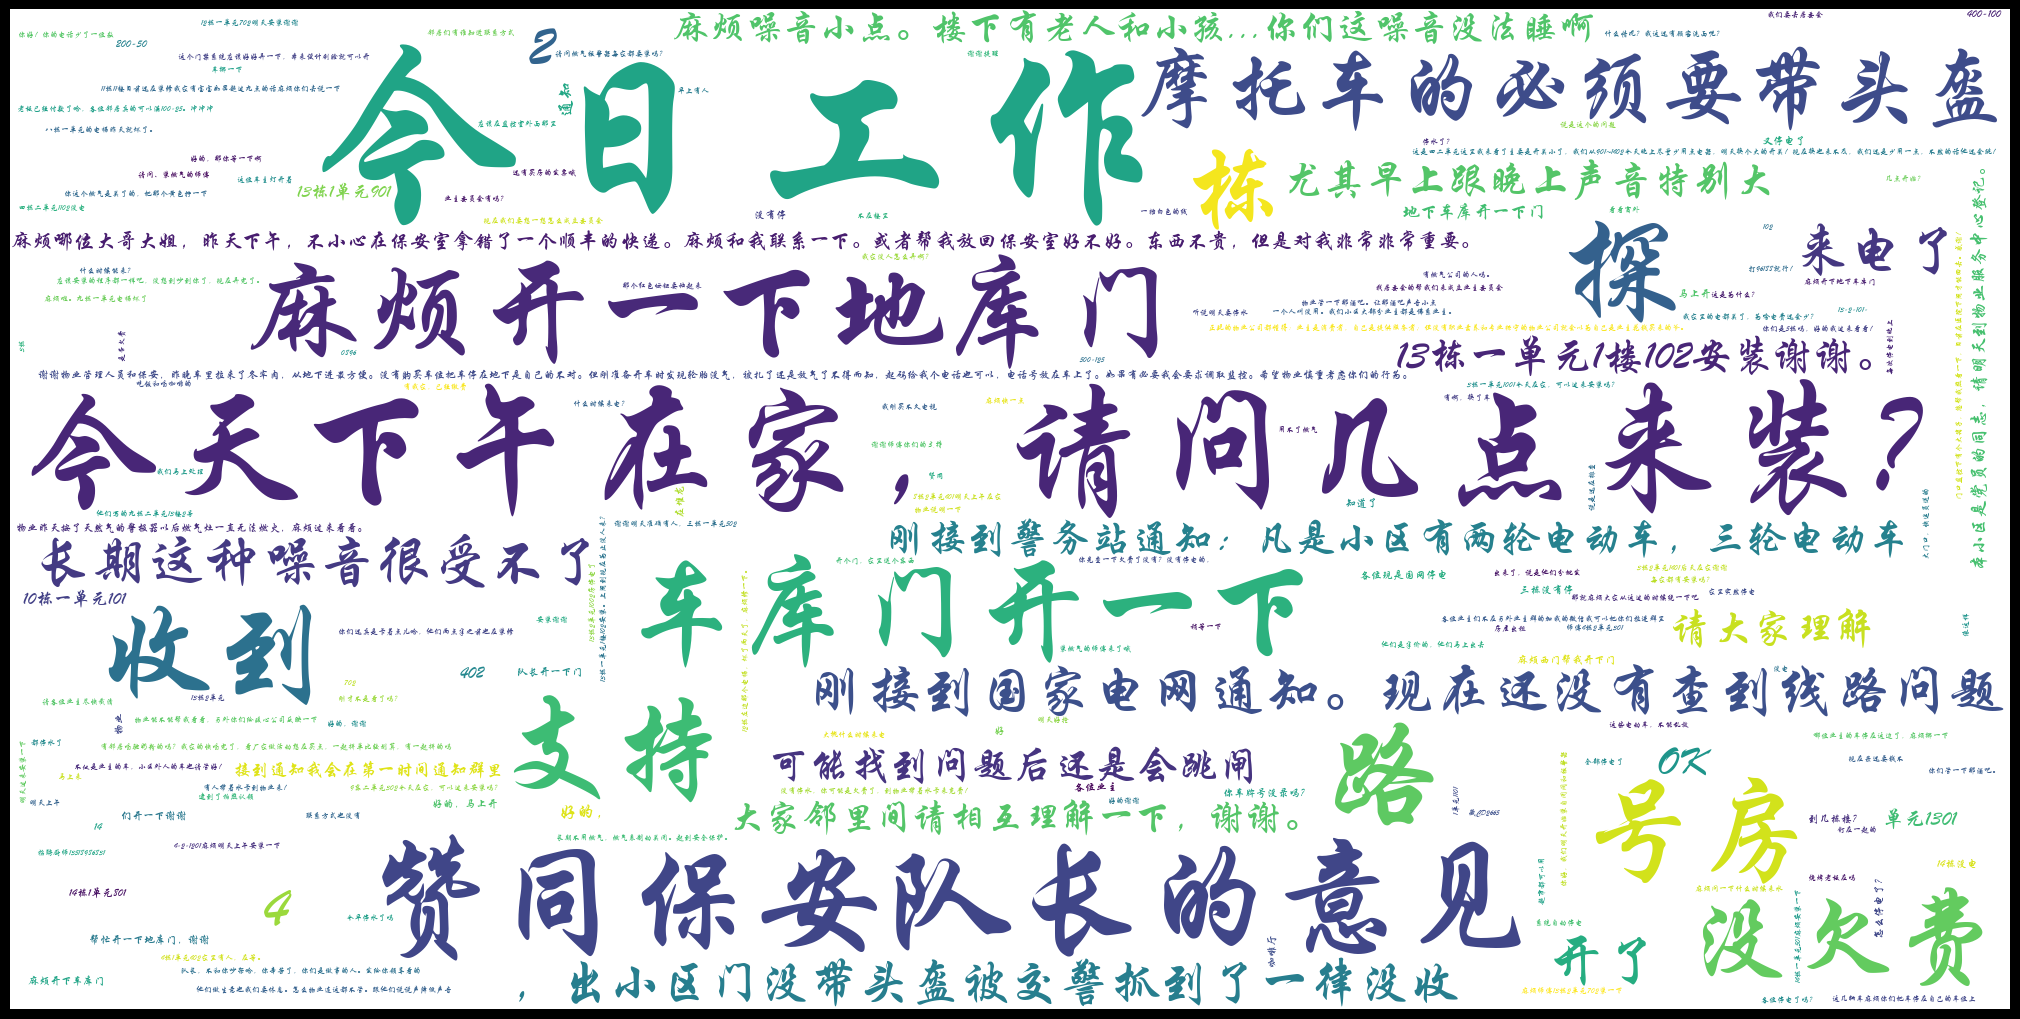

In [3]:

# ÊõøÊç¢‰ª•‰∏ãË∑ØÂæÑ‰∏∫ÊÇ®ÁöÑÊñá‰ª∂Â§πË∑ØÂæÑ
folder_path = r'D:\Downloads\export\25361401114@chatroom_‰∏úÂòé‰∏ÄÂìÅ‰∏ö‰∏ªÁæ§_'
extracted_messages = extract_messages_from_folder(folder_path)

# Â∞ÜÊâÄÊúâÊ∂àÊÅØÂêàÂπ∂‰∏∫‰∏Ä‰∏™ÈïøÂ≠óÁ¨¶‰∏≤ÔºåÁî®‰∫éÁîüÊàêËØç‰∫ë
combined_messages = ' '.join(extracted_messages)
generate_wordcloud(combined_messages)


In [4]:
extracted_messages

['&#34;‰∏úÂòé‰∏ÄÂìÅÁâ©‰∏ö18089994865&#34;ÈÇÄËØ∑&#34;YonTenTaShi&#34;Âä†ÂÖ•‰∫ÜÁæ§ËÅä',
 '&#34;ÂèØÂè£‚òû‰∏çÂèØ‰πê                                           .&#34;ÈÇÄËØ∑&#34;Ge&amp;Êõ≤&#34;Âä†ÂÖ•‰∫ÜÁæ§ËÅä',
 '&#34;Ge&amp;Êõ≤&#34;‰∏éÁæ§ÈáåÂÖ∂‰ªñ‰∫∫ÈÉΩ‰∏çÊòØÊúãÂèãÂÖ≥Á≥ªÔºåËØ∑Ê≥®ÊÑèÈöêÁßÅÂÆâÂÖ®',
 '&#34;ÂìàÊ¢ÖÊñØ-ÁΩóÂæ∑ÈáåÊ†ºÊñØ&#34;ÈÇÄËØ∑&#34;\ue51fBian\ue003,zhuo\ue115&#34;Âä†ÂÖ•‰∫ÜÁæ§ËÅä',
 '&#34;\ue51fBian\ue003,zhuo\ue115&#34;‰∏éÁæ§ÈáåÂÖ∂‰ªñ‰∫∫ÈÉΩ‰∏çÊòØÊúãÂèãÂÖ≥Á≥ªÔºåËØ∑Ê≥®ÊÑèÈöêÁßÅÂÆâÂÖ®',
 '&lt;revokemsg&gt;&#34;Ê¥ãÊπñ‰∫ëÊó¶ÊãâÊ∞¥Ê≥•ËÅîÁ≥ª17708984490&#34; Êí§Âõû‰∫Ü‰∏ÄÊù°Ê∂àÊÅØ&lt;/revokemsg&gt;',
 '@‰∏úÂòéÁâ©‰∏ö\u2005ËØ∑Áâ©‰∏öÁÆ°ÁÆ°ÈÇ£ÈÖíÂêß„ÄÇÂ£∞Èü≥ÈÉΩÂ§ßÁöÑ‰∏çÂæó‰∫Ü',
 'ËØ∑ËΩ¶‰∏ªËÅîÁ≥ªÊàë‰∏Ä‰∏ã',
 '@ÈòüÈïø\u2005ËØ∑ÂºÄ‰∏Ä‰∏ãÂêéÈó®',
 'Êú¨Â∫óÊé®Âá∫ÁæäËÇâÊ±§ÔºåÊ¨¢ËøéÊñ∞ËÄÅÂÆ¢Êà∑ÂÖâ‰∏¥',
 'ÂêÑ‰ΩçÔºåÊú¨Â∞èÂå∫Âá∫Áßü‰∏ÄÂ•óÔºå159Âπ≥ÂõõÂÆ§‰∏§ÂéÖ‰∏§Âç´ÔºåÊñ∞Ë£Ö‰øÆÔºåÈ¶ñÊ¨°Âá∫ÁßüÔºåÈááÂÖâÂ•ΩÔºåÈöèÊó∂ÂèØ‰ª•ÁúãÊàø„ÄÇÊúâÊÑèËÄÖËÅîÁ≥ª:133 0896 3636',
 'ÈòüÈïøÂºÄÂú∞‰∏ãÈó®',
 'Â•ΩÁöÑÔºåÈ©¨‰∏äÂºÄ',
 '